In [54]:
import torch
import torch.nn as nn

In [55]:
import matplotlib.pyplot as plt

In [56]:
import torchviz

In [57]:
nX, nH1, nH2, nY = 2, 5, 3, 1
 
model = nn.Sequential(
          nn.Linear(nX, nH),    # перший шар 
          nn.Sigmoid(),
          nn.Linear(nH1, nH2),
          nn.Sigmoid(),          # активація прихованого шару сигмоїдою
          nn.Linear(nH2, nY),    # другий шар
          nn.Sigmoid() )        # активація другого шару

In [58]:
class TwoLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(TwoLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2)
        self.fc3 = nn.Linear(nH2, nY)            # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x) 
        x = self.fc3(x)                          # вихід другого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        return x
          
model = TwoLayersNet(2, 5, 3, 1)                    # створення екземпляру класу

In [59]:
X = torch.rand (1200,2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) 
     < 0.1).float().view(-1,1)

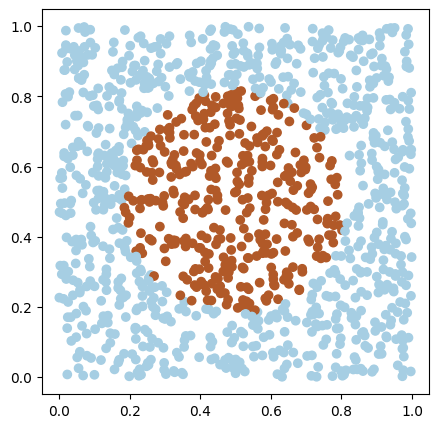

In [60]:
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], 
            c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [61]:
model = TwoLayersNet(2, 5, 3, 1)                                  
 
loss      = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),         
                            lr=0.5)        

In [62]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
                      
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
  
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
                                     
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

In [63]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000                                           # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0203 accuracy: 0.0533
epoch:     0 loss: 0.0214 accuracy: 0.0533
epoch:   100 loss: 0.0014 accuracy: 0.0825
epoch:   200 loss: 0.0008 accuracy: 0.0825
epoch:   300 loss: 0.0001 accuracy: 0.0833
epoch:   400 loss: 0.0000 accuracy: 0.0833
epoch:   500 loss: 0.0000 accuracy: 0.0833
epoch:   600 loss: 0.0000 accuracy: 0.0833
epoch:   700 loss: 0.0000 accuracy: 0.0833
epoch:   800 loss: 0.0000 accuracy: 0.0833
epoch:   900 loss: 0.0000 accuracy: 0.0833
epoch:   999 loss: 0.0000 accuracy: 0.0833


In [64]:
print(model)

TwoLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


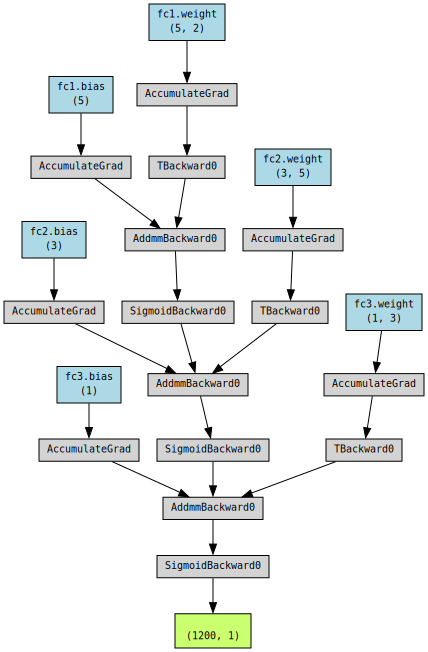

In [65]:
torchviz.make_dot(model(X),  
                  params = dict(model.named_parameters()) )

# В сети с тремя слоями потребовалось меньше эпох для снижения ошибки до минимума